## This Lecture
* Multivariable Interpolation

## Multivariable Interpolation

### <font color=blue>Example</font>
We simulate noisy measurements by adding random noise to a known function:
$$
f(x,y) = e^{-(x+0.5)^2-2(y+0.5)^2}-e^{-(x-0.5)^2-2(y-0.5)^2}
$$

In [1]:
#import moduels
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
x=y=np.linspace(-2,2,10) 

In [3]:
def f(x,y):
    return np.exp(-(x+0.5)**2-2.*(y+0.5)**2)-np.exp(-(x-0.5)**2-2.*(y-0.5)**2)

In [5]:
X,Y=np.meshgrid(x,y)

In [6]:
# add some noise to it to simulate uncertain measurements at grid points X, Y
Z=f(X,Y)+0.05*np.random.randn(*X.shape) 

Now, interpolate at the grid points using the uncertain measurements

In [7]:
# cubic interpolation 
f_i= interpolate.interp2d(x,y,Z,kind='cubic') # note x,y are 1D array and Z is 2D array

Now, let's plot both the known function and the interpolated function

In [9]:
xx=yy=np.linspace(-2,2,100) # create an oversampling for plotting
XX,YY=np.meshgrid(xx,yy)

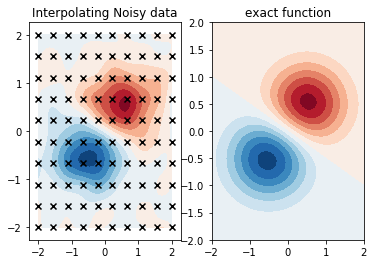

In [12]:
fig,axs=plt.subplots(1,2)
axs[0].contourf(XX,YY,f_i(xx,yy),15,cmap=plt.cm.RdBu)  # note: for interpolant, we supply 1D arrays  
axs[0].scatter(X,Y,marker='x',color='k')
axs[0].set_title('Interpolating Noisy data')
axs[1].contourf(XX,YY,f(XX,YY),15,cmap=plt.cm.RdBu)
axs[1].set_title('exact function')

plt.show()

### Interpolating irregular coordinates ###

eg. observations or other data collection processes occurs at irregular locations. 
For plotting purpose, we want to interpolate these data onto a regular coordinate grid

**scipy** provides **interpolate.griddata** for this purpose

**example**: We take the function
$$
f(x,y)=\exp(-x^2-y^2)\cos4x\sin6y
$$
and randomly select sampling points in the interval [-1,1] along the $x$ and $y$ coordinates. The
resulting data $(x_i,y_i,z_i)$ is then interpolated onto a supersampled regular grid on $[0,1]\times[0,1]$

In [13]:
f = lambda x,y: np.exp(-x**2-y**2)*np.cos(4*𝑥)*np.sin(6*𝑦)

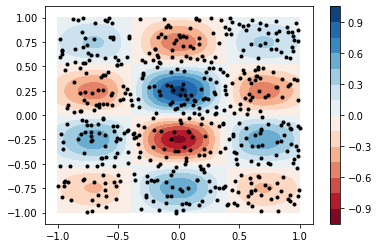

In [20]:
N=500
xdata=np.random.uniform(-1,1,N)
ydata=np.random.uniform(-1,1,N)
zdata=f(xdata,ydata)

#supersampled grid
x=y=np.linspace(-1,1,100)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
fig,ax=plt.subplots()
c=ax.contourf(X,Y,Z,15,cmap=plt.cm.RdBu)
ax.scatter(xdata[:500],ydata[:500],marker='.',color='k')
cb=fig.colorbar(c)

plt.show()


The sampled data have a pretty good coverage of the region of interest. So interpolation using these data should be able to reconstruct the function relatively accurately

In [16]:
# interpolation using three different methods
def z_interpolate(xdata,ydata,zdata):
    Zi_0=interpolate.griddata((xdata,ydata),zdata,(X,Y),method='nearest')
    Zi_1=interpolate.griddata((xdata,ydata),zdata,(X,Y),method='linear')
    Zi_3=interpolate.griddata((xdata,ydata),zdata,(X,Y),method='cubic')
    return Zi_0,Zi_1,Zi_3

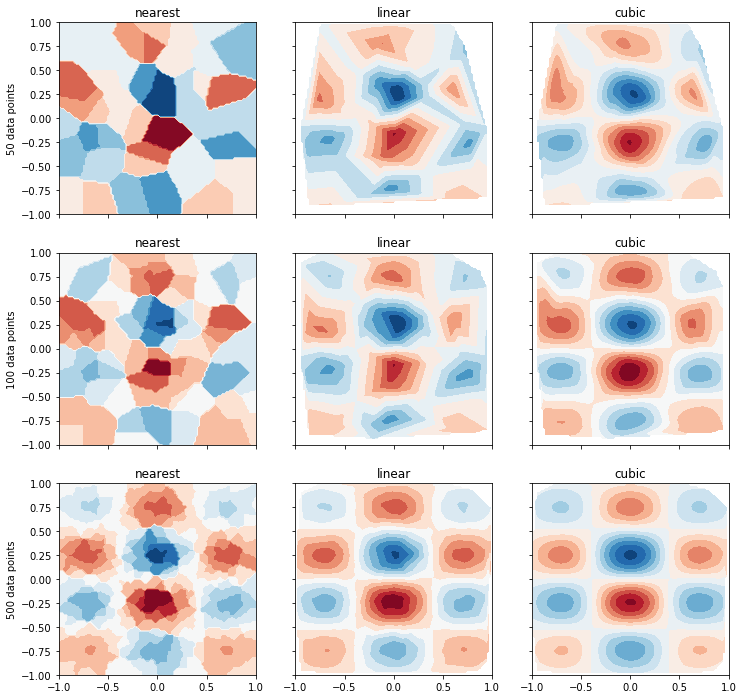

In [17]:
fig,axes=plt.subplots(3,3,figsize=(12,12),sharex=True,sharey=True)
n_vec=[50,100,500]
for idx,n in enumerate(n_vec):
    Zi_0,Zi_1,Zi_3=z_interpolate(xdata[:n],ydata[:n],zdata[:n])
    axes[idx,0].contourf(X,Y, Zi_0,15,cmap=plt.cm.RdBu)
    axes[idx,0].set_title('nearest')
    axes[idx,0].set_ylabel('%d data points' % n)
    
    axes[idx,1].contourf(X,Y, Zi_1,15,cmap=plt.cm.RdBu)
    axes[idx,1].set_title('linear')
    
    axes[idx,2].contourf(X,Y, Zi_3,15,cmap=plt.cm.RdBu)
    axes[idx,2].set_title('cubic')

### Summary
* it is possible to reconstruct a function from interpolation of unstructed samples, as long as the region of interest is well covered
* cubic spline interpolation is much better than the other two methods
* We have leared how to use **numpy**'s **polynomial** and **scipy**'s **interpolate** modules to perform interpolation


HW2 will be posted today